In [4]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [5]:
# Load the dataset
df = pd.read_csv('digital_literacy_dataset.csv')
# Display the first few rows of the dataset
df.head()

,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,...,7,15.85,92,12,Low,77,4,51,Yes,58.2
1,U0002,60,Female,High School,Farmer,Low,Rural,22,14,35,...,9,22.24,88,24,Low,76,4,98,Yes,55.3
2,U0003,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,...,13,12.15,67,17,Low,67,5,75,Yes,52.3
3,U0004,34,Female,Secondary,Farmer,Low,Rural,6,32,17,...,8,25.59,69,28,Medium,59,1,61,Yes,55.5
4,U0005,50,Male,High School,Other,Medium,Rural,14,41,19,...,8,16.65,76,10,Medium,90,4,82,No,59.3


In [6]:
#Create DataFrame

df = pd.DataFrame(df)
display(df)

,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,...,7,15.85,92,12,Low,77,4,51,Yes,58.2
1,U0002,60,Female,High School,Farmer,Low,Rural,22,14,35,...,9,22.24,88,24,Low,76,4,98,Yes,55.3
2,U0003,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,...,13,12.15,67,17,Low,67,5,75,Yes,52.3
3,U0004,34,Female,Secondary,Farmer,Low,Rural,6,32,17,...,8,25.59,69,28,Medium,59,1,61,Yes,55.5
4,U0005,50,Male,High School,Other,Medium,Rural,14,41,19,...,8,16.65,76,10,Medium,90,4,82,No,59.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,U0996,30,Female,Primary,Unemployed,Low,Rural,18,49,27,...,15,28.28,61,20,Low,98,4,85,No,73.1
996,U0997,30,Female,Secondary,Student,Medium,Rural,25,24,24,...,13,14.06,73,26,Medium,74,2,76,No,60.5
997,U0998,31,Female,Secondary,Farmer,Low,Semi-Rural,35,19,36,...,7,29.91,65,14,Low,66,1,86,Yes,63.8
998,U0999,62,Male,Secondary,Farmer,Medium,Rural,39,12,47,...,12,28.34,91,21,High,83,4,73,Yes,60.0


In [7]:
#Data Cleaning
#Delete unimportant columns in the analysis
df.drop(['Average_Time_Per_Module','Quiz_Performance','Session_Count','Engagement_Level','Feedback_Rating'], axis=1 ,inplace=True)
display(df)


,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,Post_Training_Internet_Usage_Score,Post_Training_Mobile_Literacy_Score,Modules_Completed,Adaptability_Score,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,54,50,72,7,77,51,Yes,58.2
1,U0002,60,Female,High School,Farmer,Low,Rural,22,14,35,52,39,76,9,76,98,Yes,55.3
2,U0003,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,46,52,61,13,67,75,Yes,52.3
3,U0004,34,Female,Secondary,Farmer,Low,Rural,6,32,17,36,73,64,8,59,61,Yes,55.5
4,U0005,50,Male,High School,Other,Medium,Rural,14,41,19,44,87,52,8,90,82,No,59.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,U0996,30,Female,Primary,Unemployed,Low,Rural,18,49,27,62,99,62,15,98,85,No,73.1
996,U0997,30,Female,Secondary,Student,Medium,Rural,25,24,24,50,73,62,13,74,76,No,60.5
997,U0998,31,Female,Secondary,Farmer,Low,Semi-Rural,35,19,36,71,46,72,7,66,86,Yes,63.8
998,U0999,62,Male,Secondary,Farmer,Medium,Rural,39,12,47,69,37,71,12,83,73,Yes,60.0


In [8]:
# Check for duplicates values
unique_df=df.drop_duplicates()
display(unique_df)

# Check for missing values
df.isnull().sum()
# Remove White Spaces
#df.columns=df.columns.str.strip()



,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,Post_Training_Internet_Usage_Score,Post_Training_Mobile_Literacy_Score,Modules_Completed,Adaptability_Score,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,54,50,72,7,77,51,Yes,58.2
1,U0002,60,Female,High School,Farmer,Low,Rural,22,14,35,52,39,76,9,76,98,Yes,55.3
2,U0003,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,46,52,61,13,67,75,Yes,52.3
3,U0004,34,Female,Secondary,Farmer,Low,Rural,6,32,17,36,73,64,8,59,61,Yes,55.5
4,U0005,50,Male,High School,Other,Medium,Rural,14,41,19,44,87,52,8,90,82,No,59.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,U0996,30,Female,Primary,Unemployed,Low,Rural,18,49,27,62,99,62,15,98,85,No,73.1
996,U0997,30,Female,Secondary,Student,Medium,Rural,25,24,24,50,73,62,13,74,76,No,60.5
997,U0998,31,Female,Secondary,Farmer,Low,Semi-Rural,35,19,36,71,46,72,7,66,86,Yes,63.8
998,U0999,62,Male,Secondary,Farmer,Medium,Rural,39,12,47,69,37,71,12,83,73,Yes,60.0


User_ID                                           0
Age                                               0
Gender                                            0
Education_Level                                 212
Employment_Status                                 0
Household_Income                                  0
Location_Type                                     0
Basic_Computer_Knowledge_Score                    0
Internet_Usage_Score                              0
Mobile_Literacy_Score                             0
Post_Training_Basic_Computer_Knowledge_Score      0
Post_Training_Internet_Usage_Score                0
Post_Training_Mobile_Literacy_Score               0
Modules_Completed                                 0
Adaptability_Score                                0
Skill_Application                                 0
Employment_Impact                                 0
Overall_Literacy_Score                            0
dtype: int64

In [16]:
# 
mean_summary = df.groupby('Location_Type')['Basic_Computer_Knowledge_Score'].mean()

sum_summary = df.groupby('Location_Type')['Basic_Computer_Knowledge_Score'].sum()
mean_summary
sum_summary

Location_Type
Rural         17484
Semi-Rural     7486
Name: Basic_Computer_Knowledge_Score, dtype: int64

In [10]:

#Analysis of the difference between men and women in their response speed
male_scores = df[df['Gender'] == 'Male'][['Post_Training_Basic_Computer_Knowledge_Score', 'Post_Training_Internet_Usage_Score', 'Post_Training_Mobile_Literacy_Score']].to_numpy()
female_scores = df[df['Gender'] == 'Female'][['Post_Training_Basic_Computer_Knowledge_Score', 'Post_Training_Internet_Usage_Score', 'Post_Training_Mobile_Literacy_Score']].to_numpy()
var=['Post_Training_Basic_Computer_Knowledge_Score','Post_Training_Internet_Usage_Score','Post_Training_Mobile_Literacy_Score']
# Chart using NumPy
male_means = np.mean(male_scores, axis=0)
female_means = np.mean(female_scores, axis=0)

male_means1=np.round(male_means)
female_means1=np.round(female_means)
display(male_means1)
display(female_means1)

array([60., 61., 61.])

array([61., 59., 61.])

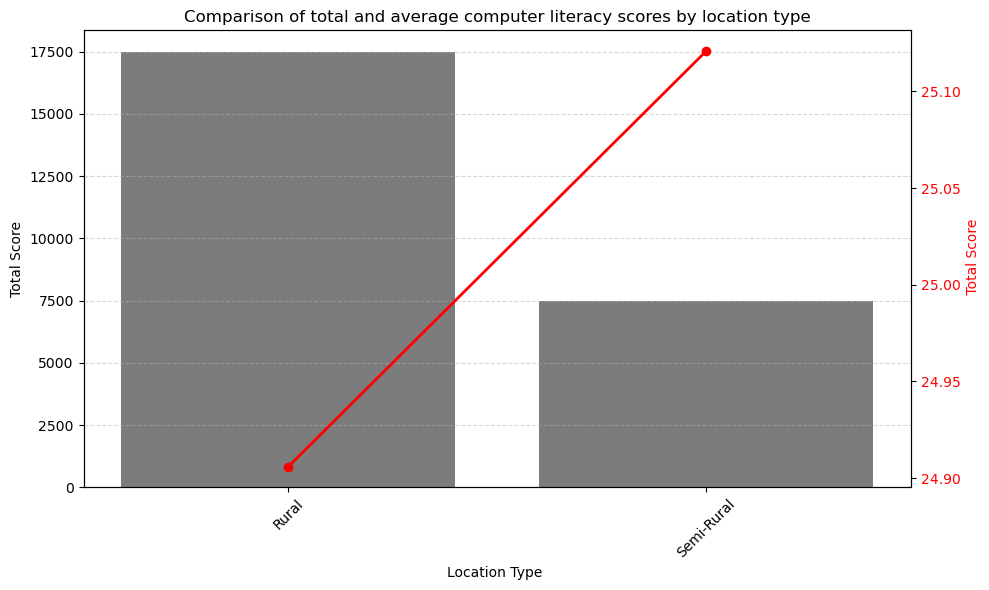

In [28]:

fig, ax1 = plt.subplots(figsize=(10, 6))
# Draw the columns (representing the total)
ax1.bar(sum_summary.index, sum_summary.values, color='#444444', alpha=0.7, label=' Total Score')
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

# Allocate the first axis
ax1.set_xlabel('Location Type ')
ax1.set_ylabel('Total Score', color='black')
ax1.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=45)

# Create the second axis of the line graph.
ax2 = ax1.twinx()
ax2.plot(mean_summary.index, mean_summary.values, color='red', marker='o', linestyle='-', linewidth=2, label='Total Score ')

# Allocate the second axis
ax2.set_ylabel(' Total Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Add title and caption

plt.title('Comparison of total and average computer literacy scores by location type')
fig.tight_layout()
plt.show()

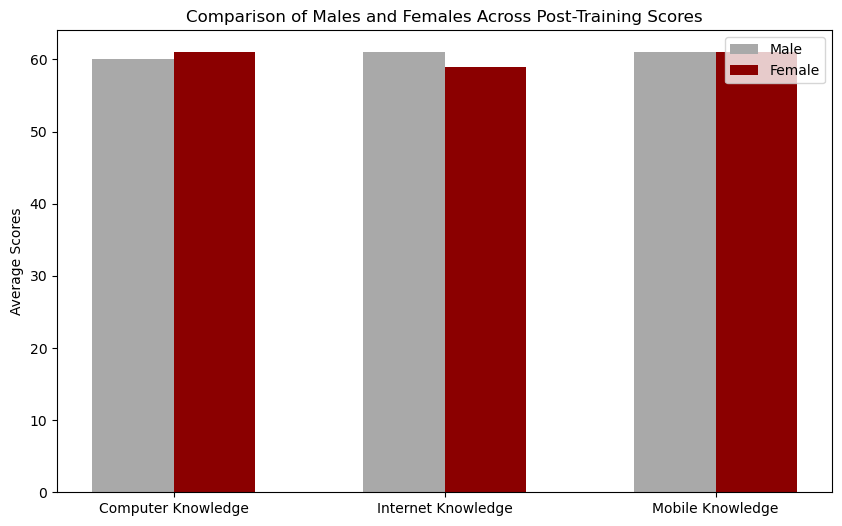

In [38]:
# Arrange the columns on the X-axis.
x = np.arange(len(var))

# Drawing a multi-column bar chart
width = 0.3  
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width/2, male_means1, width, label='Male', color='darkgray')  #male column drawing
ax.bar(x + width/2, female_means1, width, label='Female', color='darkred')  #femals column drawing

# إضافة عناوين
ax.set_xlabel('')
ax.set_ylabel('Average Scores')
ax.set_title('Comparison of Males and Females Across Post-Training Scores')
ax.set_xticks(x)  # Determine the positions of the markers on the X axis.
ax.set_xticklabels(['Computer Knowledge','Internet Knowledge','Mobile Knowledge'])
ax.legend()

plt.show()

Mean Squared Error: 98.61
R-squared Score: -0.02


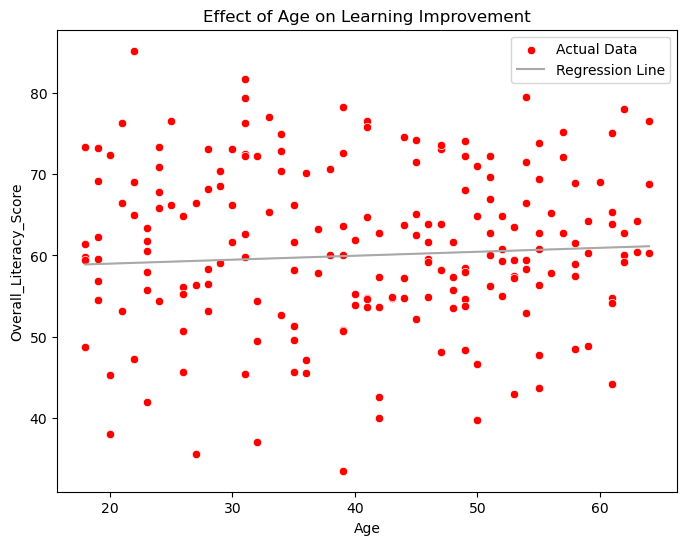

In [36]:
X = df[['Age']]  # independent variable
y = df['Overall_Literacy_Score']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Show model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")  # If it is close to 1, it means a strong relationship.

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['Age'], y=y_test, color='red', label="Actual Data")
sns.lineplot(x=X_test['Age'], y=y_pred, color='darkgray', label="Regression Line")
plt.xlabel("Age")
plt.ylabel("Overall_Literacy_Score")
plt.title("Effect of Age on Learning Improvement")
plt.legend()
plt.show()